<a href="https://colab.research.google.com/github/HimalKarkal/NFL/blob/Plays-Analysis/Zero_Yardage_Plays_and_Match_Outcome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction



Question: How do plays that result in zero or negative yardage gained by the offensive team relate to match outcome?

# Data Preparation

In this section, I will clean and prepare the datasets to be used for analysis.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [150]:
df_plays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/plays.csv')
df_games = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/games.csv')

In [151]:
df_plays.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [152]:
#Removing all the unnecessary columns from df_plays

df_plays = df_plays[["gameId", "defensiveTeam", "playResult"]]
df_plays.head(5)

,gameId,defensiveTeam,playResult
0,2022100908,TB,9
1,2022091103,CIN,3
2,2022091111,LAC,15
3,2022100212,LV,7
4,2022091900,TEN,3


In [153]:
df_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gameId         12486 non-null  int64 
 1   defensiveTeam  12486 non-null  object
 2   playResult     12486 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 292.8+ KB


In [154]:
df_plays = df_plays.sort_values(by="gameId", ascending=True).reset_index(drop = True)
df_plays.head(5)

,gameId,defensiveTeam,playResult
0,2022090800,BUF,-1
1,2022090800,LA,2
2,2022090800,LA,7
3,2022090800,LA,5
4,2022090800,BUF,5


In [155]:
df_plays_overall = df_plays.groupby(['gameId', 'defensiveTeam'])['playResult'].count()
df_plays_overall = pd.DataFrame(df_plays_overall)
df_plays_overall.rename(columns={"playResult": "plays_count"}, inplace=True)
df_plays_overall.head(5)

plays_count
gameId     defensiveTeam             
2022090800 BUF                     45
           LA                      46
2022091100 ATL                     40
           NO                      58
2022091101 CAR                     56

In [156]:
df_plays_overall = df_plays_overall.reset_index()
df_plays_overall = df_plays_overall[['gameId', 'defensiveTeam', 'plays_count']]
df_plays_overall.head(5)

,gameId,defensiveTeam,plays_count
0,2022090800,BUF,45
1,2022090800,LA,46
2,2022091100,ATL,40
3,2022091100,NO,58
4,2022091101,CAR,56


In [157]:
df_plays_overall['zero_ydg_play_count'] = df_plays.groupby(['gameId', 'defensiveTeam'])['playResult'].transform(lambda x: (x <= 0).sum())
df_plays_overall.head(5)

,gameId,defensiveTeam,plays_count,zero_ydg_play_count
0,2022090800,BUF,45,5
1,2022090800,LA,46,1
2,2022091100,ATL,40,1
3,2022091100,NO,58,1
4,2022091101,CAR,56,5


In [158]:
df_plays_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gameId               271 non-null    int64 
 1   defensiveTeam        271 non-null    object
 2   plays_count          271 non-null    int64 
 3   zero_ydg_play_count  271 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.6+ KB


In [159]:
df_games.head(5)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


In [165]:
joined_df = df_plays_overall.merge(df_games, on="gameId", how="left")
joined_df.head()

,gameId,defensiveTeam,plays_count,zero_ydg_play_count,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,BUF,45,5,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022090800,LA,46,1,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
2,2022091100,ATL,40,1,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
3,2022091100,NO,58,1,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
4,2022091101,CAR,56,5,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26


In [166]:
df_final = joined_df[['defensiveTeam', 'plays_count', 'zero_ydg_play_count', 'homeTeamAbbr',	'visitorTeamAbbr',	'homeFinalScore',	'visitorFinalScore']]
df_final.head(5)

,defensiveTeam,plays_count,zero_ydg_play_count,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,BUF,45,5,LA,BUF,10,31
1,LA,46,1,LA,BUF,10,31
2,ATL,40,1,ATL,NO,26,27
3,NO,58,1,ATL,NO,26,27
4,CAR,56,5,CAR,CLE,24,26


In [171]:
df_final["result"] = np.where(
    (df_final["defensiveTeam"] == df_final["homeTeamAbbr"]) & (df_final["homeFinalScore"] > df_final["visitorFinalScore"]),
    'win',
    np.where(
        (df_final["defensiveTeam"] == df_final["visitorTeamAbbr"]) & (df_final["visitorFinalScore"] > df_final["homeFinalScore"]),
        'win',
        'loss'
    )
)
df_final.head(5)



<ipython-input-171-07ebe4397813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["result"] = np.where(


,defensiveTeam,plays_count,zero_ydg_play_count,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore,result
0,BUF,45,5,LA,BUF,10,31,win
1,LA,46,1,LA,BUF,10,31,loss
2,ATL,40,1,ATL,NO,26,27,loss
3,NO,58,1,ATL,NO,26,27,win
4,CAR,56,5,CAR,CLE,24,26,loss


In [172]:
df_final = df_final[['plays_count', 'zero_ydg_play_count', 'result']]
df_final.head(5)

,plays_count,zero_ydg_play_count,result
0,45,5,win
1,46,1,loss
2,40,1,loss
3,58,1,win
4,56,5,loss


# Linear Regression

In [175]:
df_final['result'] = df_final['result'].apply(lambda x: 1 if x == 'win' else 0)

In [179]:
X = df_final[['plays_count', 'zero_ydg_play_count']]
y = df_final['result']

X = X.astype(float)
y = y.astype(float)

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     8.894
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           0.000182
Time:                        04:19:59   Log-Likelihood:                -187.96
No. Observations:                 271   AIC:                             381.9
Df Residuals:                     268   BIC:                             392.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2624    

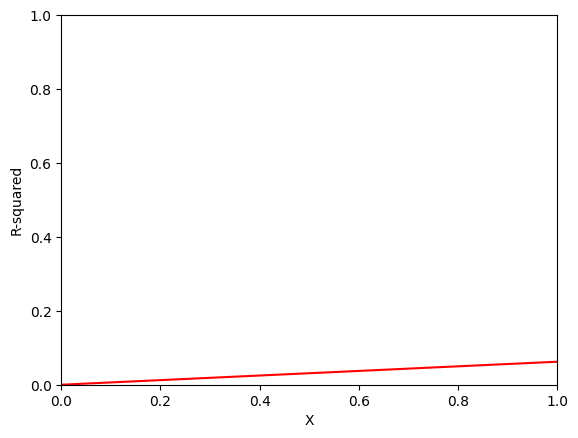

In [180]:
# Calculate the R-squared value
r_squared = model.rsquared

# Create a line graph
plt.plot([0, 1], [0, r_squared], color='red')

# Set the axis labels and limits
plt.xlabel('X')
plt.ylabel('R-squared')
plt.xlim([0, 1])
plt.ylim([0, 1])

# Display the graph
plt.show()
